<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/MineriaDatos/Practica3_1_3_2MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practica 3.1 Minería de Datos

Francia Alday Martínez
# Clusterización

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Transacciones ventas.csv', sep=',', encoding='latin-1')
data.head()

,Sector,Marca,Linea_2,Sublinea_2,Presentacion,Gramaje_2,Empresa,Año,Fecha,Cliente,...,Fecha_2,Year,Quarter,Month,Day,Dia_Num_Sem,Dia_Semana_,IND_Compra,IND_Precio_Sospech_15,IND_PrecioSospech20
0,CARNES FRIAS,MARCA MAY,JAMONES,PECHUGA,PAQUETERIA,0.26,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
1,QUESOS,MARCA TLA,Q-MADURADOS,MANCHEGO,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
2,QUESOS,MARCA CHIA,Q-FRESCOS,PANELA,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
3,COMIDAS PREPARADAS,CHEF,POLLO,CONGELADO,PAQUETERIA,0.45,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
4,CARNES FRIAS,MARCA HID,SALCHICHA,SALCHICHA TRADICIONA,PAQUETERIA,0.55,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sector                 58903 non-null  object 
 1   Marca                  58903 non-null  object 
 2   Linea_2                58903 non-null  object 
 3   Sublinea_2             58903 non-null  object 
 4   Presentacion           58903 non-null  object 
 5   Gramaje_2              58903 non-null  float64
 6   Empresa                58903 non-null  object 
 7   Año                    58903 non-null  int64  
 8   Fecha                  58903 non-null  object 
 9   Cliente                58903 non-null  object 
 10  Nota                   58903 non-null  int64  
 11  Pedido                 58903 non-null  int64  
 12  Control                58903 non-null  int64  
 13  Producto               58903 non-null  int64  
 14  Descripcion            58903 non-null  object 
 15  Un

## Exploración de datos:

In [ ]:
data["No._Hijos"].sort_values().unique()

array([0, 1, 2, 3, 4, 8])

In [ ]:
data["Antiguedad"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 38])

In [ ]:
len(data["Clave_Cliente"].sort_values().unique())

524

Si quiero separar por tipo de clientes, tomaré toda la información relevante de los clientes.
Sería mejor hacer un nuevo dataframe "Clientes" con las columnas de la info de clientes, a eso aplicar el método de codo y luego k-means a ver que pasa.

In [ ]:
data.columns

Index(['Sector', 'Marca', 'Linea_2', 'Sublinea_2', 'Presentacion', 'Gramaje_2',
       'Empresa', 'Año', 'Fecha', 'Cliente', 'Nota', 'Pedido', 'Control',
       'Producto', 'Descripcion', 'Unidad', 'Cantidad', 'Precio', 'Dummy_1',
       'Precio_Max', 'Dif_PrecioMax', 'Importe', 'Clave_Cliente', 'No._Hijos',
       'Antiguedad', 'Edad', 'Edad_Rango', 'Escolaridad', 'Estado_Civil',
       'Estado', 'Sexo', 'Funcion', 'Grupo', 'Fecha_2', 'Year', 'Quarter',
       'Month', 'Day', 'Dia_Num_Sem', 'Dia_Semana_', 'IND_Compra',
       'IND_Precio_Sospech_15', 'IND_PrecioSospech20'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nuevo Leon'),
  Text(1, 0, 'Coahuila'),
  Text(2, 0, 'Jalisco'),
  Text(3, 0, 'Puebla'),
  Text(4, 0, 'Sonora'),
  Text(5, 0, 'Hidalgo'),
  Text(6, 0, 'Estado de Mexico'),
  Text(7, 0, 'Sinaloa'),
  Text(8, 0, 'Guanajuato'),
  Text(9, 0, 'Distrito Federal'),
  Text(10, 0, 'San Luis Potosi'),
  Text(11, 0, 'Queretaro'),
  Text(12, 0, 'Veracruz'),
  Text(13, 0, 'Durango'),
  Text(14, 0, 'Baja California'),
  Text(15, 0, 'Chihuahua')])

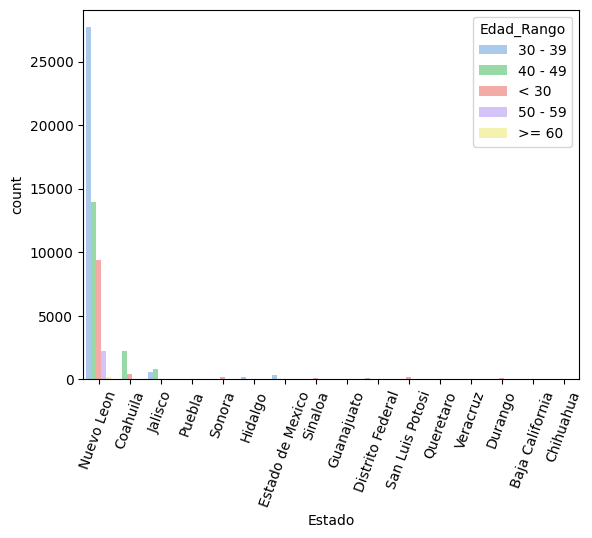

In [ ]:
sns.countplot(data=data, x="Estado", hue="Edad_Rango", palette="pastel6")
plt.xticks(rotation=70)

La mayoría de los clientes son de Nuevo Leon

Clientes = data[["Edad_Rango","Escolaridad","Estado_Civil","Sexo","Funcion","Grupo","Estado"]]
Clientes

## Preprocesamiento

Voy a ver como se comportan las siguientes variables:

In [ ]:
Clientes = data[["Clave_Cliente","Edad","Importe","Antiguedad"]]
Clientes.head()

,Clave_Cliente,Edad,Importe,Antiguedad
0,129070,35,41.3,10
1,129070,35,110.4,10
2,129070,35,60.6,10
3,129070,35,23.5,10
4,129070,35,20.6,10


Como cada cliente se repite varias veces en los datos, voy a tomar las claves únicas de los clientes para saber cuantos clientes tengo y hacer el análisis sobre cada uno de ellos

In [ ]:
# Crear un nuevo DataFrame con las filas únicas de 'Clave_Cliente' y 'Edad'
clientes_unicos = Clientes[['Clave_Cliente', 'Edad',"Antiguedad"]].drop_duplicates()

# Ahora, 'clientes_unicos' contiene las filas únicas de 'Clave_Cliente' y 'Edad'
print(clientes_unicos)

       Clave_Cliente  Edad  Antiguedad
0             129070    35          10
6             168833    39           6
12            139044    48          28
21            165427    38           7
29            187492    31           4
...              ...   ...         ...
58888         212074    28           1
58891         201289    29           3
58892         218563    34           1
58896         228476    37           0
58901         230503    40           0

[524 rows x 3 columns]


sns.countplot(data=clientes_unicos, x="Antiguedad", palette="pastel6")
plt.xticks(rotation=70)

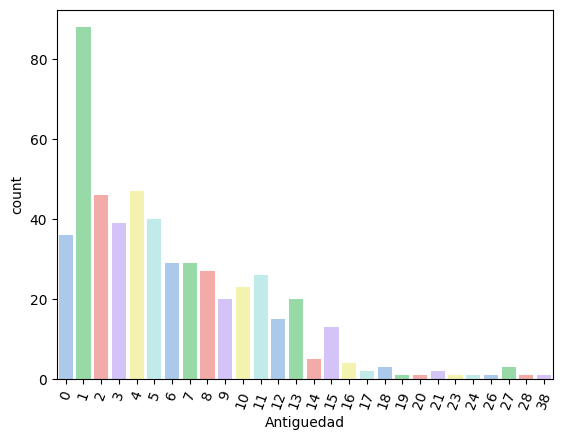

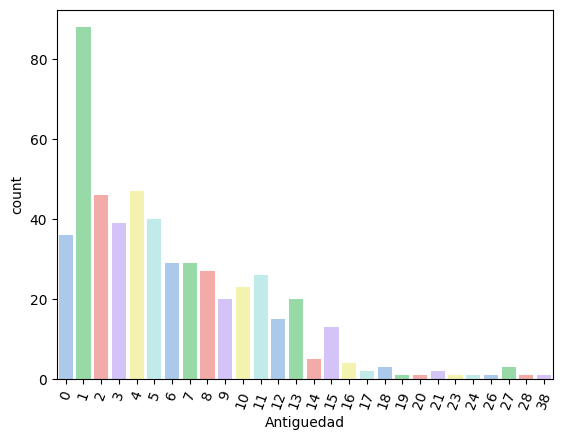

In [ ]:
sns.countplot(data=clientes_unicos, x="Antiguedad", palette="pastel6")
plt.xticks(rotation=70)
plt.show(False)  # False deshabilita la impresión de valores antes del gráfico

In [ ]:
# Agrupar el DataFrame por 'Clave_Cliente' y sumar los importes para cada cliente
total_gastado_por_cliente = Clientes.groupby('Clave_Cliente')['Importe'].sum()

# El resultado es una Serie de pandas que contiene el importe total gastado por cada cliente
# Para convertirlo de nuevo en un DataFrame:
total_gastado_por_cliente_df = total_gastado_por_cliente.reset_index()

# Renombrar columna 'Importe' a 'Importe_Total'
total_gastado_por_cliente_df.rename(columns={'Importe': 'Importe_Total'}, inplace=True)

# Ahora, 'total_gastado_por_cliente_df' contiene la suma del importe total gastado por cada cliente
print(total_gastado_por_cliente_df)

     Clave_Cliente  Importe_Total
0           100167        6791.96
1           100263        6951.88
2           100363         373.50
3           100491         328.00
4           100861       12792.41
..             ...            ...
519         229229         150.00
520         229406         240.00
521         229708         664.00
522         229789         385.50
523         230503        1040.00

[524 rows x 2 columns]


In [ ]:
# 'clientes_unicos' con las columnas 'Clave_Cliente'  'Edad' 'Antiguedad',
# y 'total_gastado_por_cliente_df' con las columnas 'Clave_Cliente' e 'Importe_Total'.

# Combinar los DataFrames en función de la columna 'Clave_Cliente'
Clientes2 = clientes_unicos.merge(total_gastado_por_cliente_df, on='Clave_Cliente')
Clientes_ = Clientes2[['Edad', 'Importe_Total', 'Antiguedad']]
# el resultado final contiene la información de 'Edad' y 'Importe_Total' para cada cliente
print(Clientes_)

     Edad  Importe_Total  Antiguedad
0      35       12284.60          10
1      39       17557.79           6
2      48      161303.15          28
3      38       34547.29           7
4      31       25111.90           4
..    ...            ...         ...
519    28         120.00           1
520    29         240.00           3
521    34        2447.00           1
522    37        1142.50           0
523    40        1040.00           0

[524 rows x 3 columns]


### Normalizar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

# transformar las columnas
datos_normalizados = escalador.fit_transform(Clientes_[['Edad', 'Importe_Total', 'Antiguedad']])

# Reemplaza las columnas originales con las columnas normalizadas en el DataFrame 'Clientes_'
Clientes_[['Edad', 'Importe_Total', 'Antiguedad']] = datos_normalizados

# Ahora, 'Clientes_' contiene las columnas 'Edad' e 'Importe_Total' normalizadas
print(Clientes_)

         Edad  Importe_Total  Antiguedad
0    0.105127       0.417206    0.757686
1    0.631011       0.843122    0.004313
2    1.814250      12.453445    4.147864
3    0.499540       2.215365    0.192656
4   -0.420757       1.453268   -0.372373
..        ...            ...         ...
519 -0.815170      -0.565330   -0.937403
520 -0.683699      -0.555638   -0.560717
521 -0.026344      -0.377378   -0.937403
522  0.368069      -0.482743   -1.125746
523  0.762482      -0.491021   -1.125746

[524 rows x 3 columns]


<ipython-input-9-d05b72f2bd62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clientes_[['Edad', 'Importe_Total', 'Antiguedad']] = datos_normalizados


In [ ]:
Clientes_.describe()

,Edad,Importe_Total,Antiguedad
count,5.240000e+02,524.000000,5.240000e+02
mean,-4.610392e-16,0.000000,5.423990e-17
std,1.000956e+00,1.000956,1.000956e+00
min,-1.472525e+00,-0.572115,-1.125746e+00
25%,-6.836994e-01,-0.504833,-7.490598e-01
50%,-1.578154e-01,-0.356297,-1.840300e-01
75%,4.995396e-01,0.128293,5.693429e-01
max,3.786315e+00,12.453445,6.031297e+00


In [ ]:
Clientes_ = Clientes_.values


```
# Para estandarizar los datos, (no lo usé)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Ajustar el escalador a los datos y transformar la columna
Clientes_NL['Antiguedad'] = scaler.fit_transform(Clientes_NL[['Antiguedad']])
Clientes_NL['No._Hijos'] = scaler.fit_transform(Clientes_NL[['No._Hijos']])
Clientes_NL
```





```
# Para hacer un one hot a ciertas variables, no lo usé porque no funcionaba de buena manera para hacer clusters
Clientes = pd.get_dummies(Clientes, columns=['Grupo'])
Clientes = pd.get_dummies(Clientes, columns=['Sector'])
Clientes
```



## K-Means

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Clientes_)
    wcss.append(kmeans.inertia_)

Para saber cuantos clusteres es mejor tomar uso el método del codo y resulta que con 4 clusteres los datos se separan bien

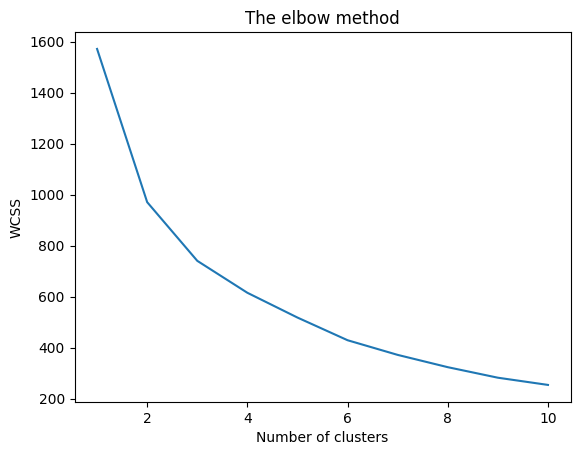

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Entonces tomo 4 clusteres

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Clientes_)

In [ ]:
#y_kmeans

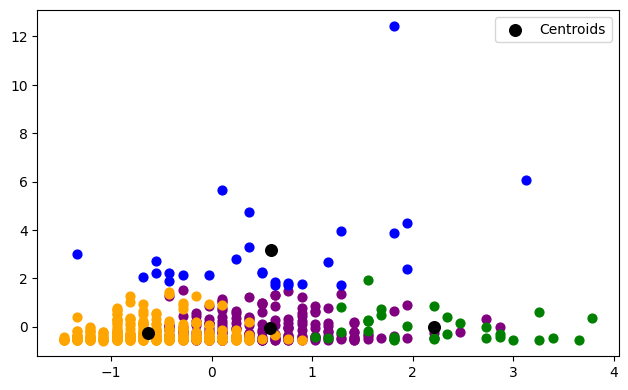

In [ ]:
# Gráfica para los clusters
plt.figure(figsize=(7.5, 4.5))
plt.scatter(Clientes_[y_kmeans == 0, 0], Clientes_[y_kmeans == 0, 1], s = 40, c = 'purple')
plt.scatter(Clientes_[y_kmeans == 1, 0], Clientes_[y_kmeans == 1, 1], s = 40, c = 'orange')
plt.scatter(Clientes_[y_kmeans == 2, 0], Clientes_[y_kmeans == 2, 1], s = 40, c = 'green')
plt.scatter(Clientes_[y_kmeans == 3, 0], Clientes_[y_kmeans == 3, 1], s = 40, c = 'blue')
#plt.scatter(Clientes_[y_kmeans == 4, 0], Clientes_[y_kmeans == 4, 1], s = 40, c = 'red')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black', label = 'Centroids')

plt.legend()

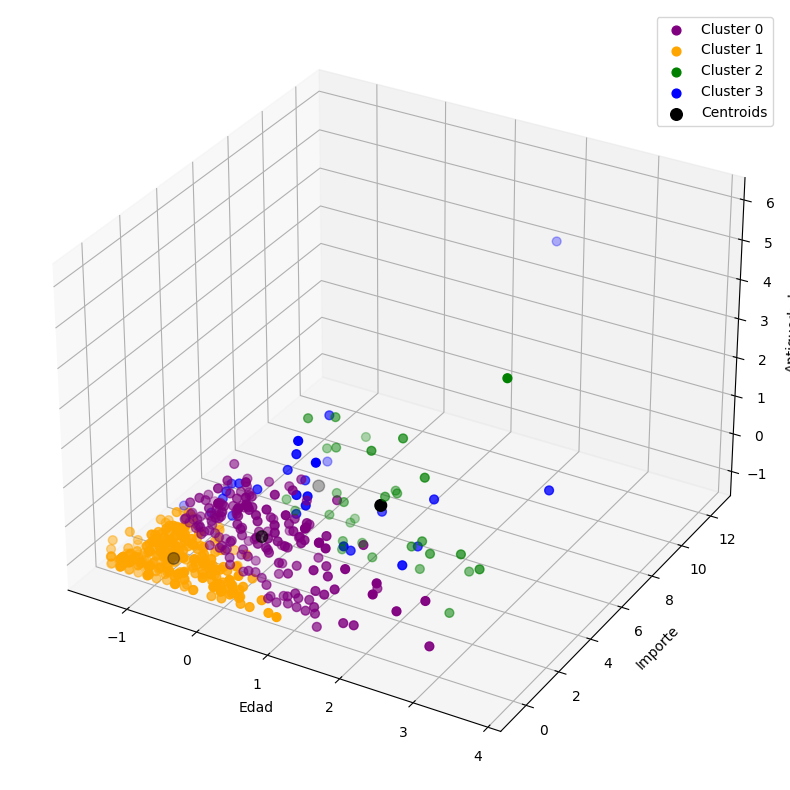

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un subplot 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Reemplaza 'z' con la columna que desees en el eje z
ax.scatter(Clientes_[y_kmeans == 0, 0], Clientes_[y_kmeans == 0, 1], Clientes_[y_kmeans == 0, 2], s=40, c='purple', label='Cluster 0')
ax.scatter(Clientes_[y_kmeans == 1, 0], Clientes_[y_kmeans == 1, 1], Clientes_[y_kmeans == 1, 2], s=40, c='orange', label='Cluster 1')
ax.scatter(Clientes_[y_kmeans == 2, 0], Clientes_[y_kmeans == 2, 1], Clientes_[y_kmeans == 2, 2], s=40, c='green', label='Cluster 2')
ax.scatter(Clientes_[y_kmeans == 3, 0], Clientes_[y_kmeans == 3, 1], Clientes_[y_kmeans == 3, 2], s=40, c='blue', label='Cluster 3')
#ax.scatter(Clientes_[y_kmeans == 4, 0], Clientes_[y_kmeans == 4, 1], Clientes_[y_kmeans == 4, 2], s=40, c='red', label='Cluster 4')

# Centroides en 3D
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=70, c='black', label='Centroids')

# Etiquetas y leyenda
ax.set_xlabel('Edad')
ax.set_ylabel('Importe')
ax.set_zlabel('Antiguedad')
plt.legend()
plt.show()


Los clusters se aprecian mejor en una gráfica 3D

In [ ]:
import plotly.express as px

# Filtrar los datos para los clústeres a visualizar (en este caso, < 4)
data = Clientes_[y_kmeans < 4]

# gráfica 3D
fig = px.scatter_3d(data, x=Clientes_[:,0], y=Clientes_[:,1], z=Clientes_[:,2], color=y_kmeans[y_kmeans < 4], size_max=18, opacity=0.7)

# apariencia de la gráfica
fig.update_layout(
    scene=dict(
        xaxis_title='Edad',
        yaxis_title='Importe_Total',
        zaxis_title='Antiguedad',
    ),
    showlegend=True,
    legend_title='Clúster',
)

fig.show()


Observaciones:

*   Clientes más jovenes gastan menos y tienen menos antiguedad, son los puntos en color rosa y se aglomeran más hacia la esquina de la gráfica aunque también están dispersos en la variable importe
*   Luego están los clientes que tienen un poco más de antiguedad y años que los anteriores pero gastan un importe parecido al de los anteriores, son los puntos azules.
*   Los clientes identificados por los puntos naranjas son en promedio los que tienen más antiguedad, son personas mayores y gastan en promedio un importe menor al de los 2 tipos de clientes anteriores
*   El último tipo de clientes son los que gastan más y se puede notar un valor muy grande en comparación a todos los demás puntos (amarillos), varían en edad, tienen una antiguedad parecida a los de los puntos azules y se observa que el punto atípico tiene una antiguedad mayor


Hay que verificar si ese valor atípico esta bien!


## GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification

Para saber cuantos clusters dar a este algoritmo para que clasifique mejor uso la siguiente gráfica con la métrica Bayesian information criterion (BIC) para identificar cómo de bien se ajustan los datos observados al modelo creado, a la vez que se controla el exceso de overfitting

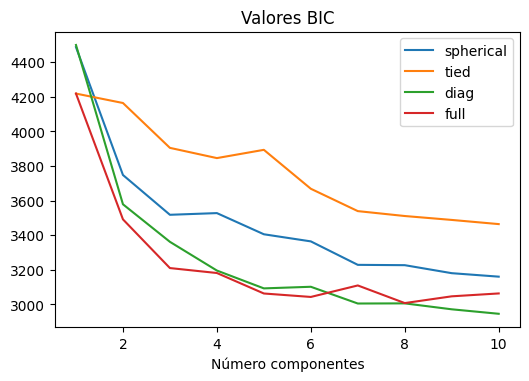

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 11)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []

    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(Clientes_)
        valores_bic.append(modelo.bic(Clientes_))

    ax.plot(n_components, valores_bic, label=covariance_type)

ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

Al entrenar un modelo GMM, junto con el número de componentes, hay que determinar el tipo de matriz de covarianza. Dependiendo esto, la forma de las distribuciones de las componentes puede ser:

*  tied: todas las componentes comparten la misma matriz de covarianza.

*  diagonal: las dimensiones de cada componente a lo largo de cada dimensión puede ser distintas, pero siempre quedan alineadas con los ejes, es decir, su orientaciones son limitadas.

*  spherical: las dimensiones de cada componente son las mismas en todas las dimensiones. Esto permite generar distribuciones de distinto tamaño pero todas esféricas.

*  full: cada componente tiene su propia matriz de covarianza, por lo que pueden tener cualquier orientación y dimensiones.

Voy a tomar el tipo de matriz de covarianza full con 4 componentes:

In [ ]:
# Definir el modelo
modelo_gmm = GaussianMixture(
                n_components    = 4,
                covariance_type = 'full',
                random_state    = 123
             )

#Entrenar el modelo
modelo_gmm.fit(Clientes_)

GaussianMixture(n_components=4, random_state=123)

In [ ]:
# asignar cada punto de datos a un grupo
gaussian_result = modelo_gmm.predict(Clientes_)

# obtener todos los grupos únicos
gaussian_clusters = unique(gaussian_result)

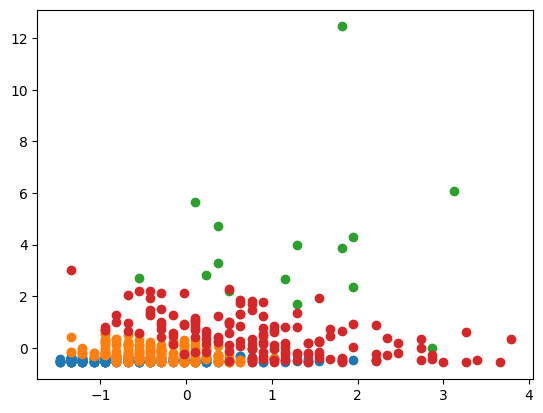

In [ ]:
# graficar los grupos de Mezcla Gaussiana
for gaussian_cluster in gaussian_clusters:
    # obtener todos los puntos de datos que caen en este grupo
    index = where(gaussian_result == gaussian_cluster)
    # hacer el gráfico
    plt.scatter(Clientes_[index, 0], Clientes_[index, 1])

plt.show()

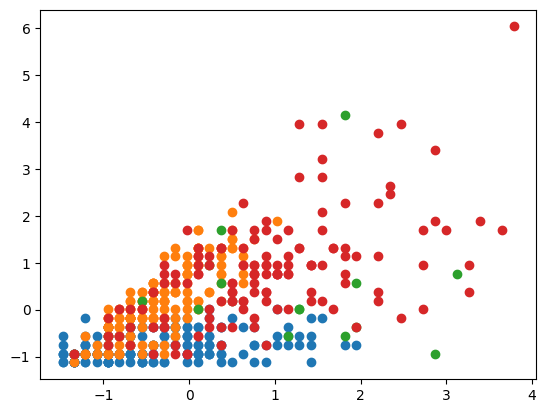

In [ ]:
# Visto desde otro plano
for gaussian_cluster in gaussian_clusters:
    # obtener todos los puntos de datos que caen en este grupo
    index = where(gaussian_result == gaussian_cluster)
    # hacer el gráfico
    plt.scatter(Clientes_[index, 0], Clientes_[index, 2])

plt.show()

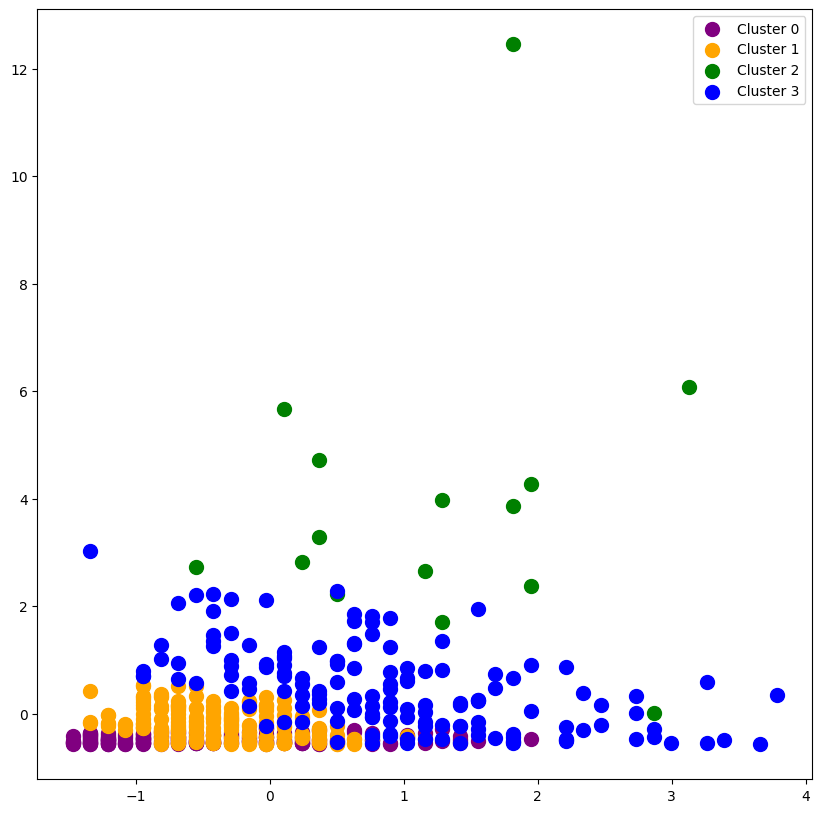

In [ ]:
# Gráfica de otra forma
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Colores para los clústeres (puedes personalizarlos según tu preferencia)
colors = ['purple', 'orange', 'green', 'blue', 'red']

# Iterar a través de cada clúster y graficar los puntos de datos
for cluster_label, color in zip(np.unique(gaussian_result), colors):
    # Filtrar los puntos de datos que pertenecen a este clúster
    cluster_points = Clientes_[gaussian_result == cluster_label]

    # Graficar los puntos del clúster con el color correspondiente
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, c=color, label=f'Cluster {cluster_label}')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


Vemos mucho mejor los clusters en una gráfica 3D

In [ ]:
import plotly.graph_objects as go

# Figura 3D
fig = go.Figure()

# Para cada grupo de Mezcla Gaussiana
for gaussian_cluster in gaussian_clusters:
    # Obtener todos los puntos de datos que caen en este grupo
    index = where(gaussian_result == gaussian_cluster)
    cluster_points = Clientes_[index]  # Asegúrate de que cluster_points contiene los puntos correctos
    # Crear un trazo de puntos 3D para el grupo actual
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        name=f'Cluster {gaussian_cluster}',  # Nombre del grupo en la leyenda
        marker=dict(
            size=5,  # Tamaño de los puntos
            color=gaussian_cluster,  # Colorear según las etiquetas de grupo
            colorscale='plotly3'  # paleta de colores
        )
    ))

# Etiquetas de la gráfica 3D
fig.update_layout(
    scene=dict(
        xaxis_title='Edad',
        yaxis_title='Importe',
        zaxis_title='Antiguedad'
    ),
    showlegend=True,
    width=800,  # Ancho de la figura en píxeles
    height=700  # Altura de la figura en píxeles
)

fig.show()

Observaciones con GMM

*  Puntos azules: estos clientes los agrupó porque son los que gastan menos, su edad varía pero no son mayores y tienen poca antiguedad
*  Puntos rojos: su promedio de edad, de gasto y de antiguedad es mayor al del conjunto anterior
*  Puntos morados: Su edad varía pero ya no son jovenes, gastan más que los dos grupos anteriores y su antiguedad varía
*  Puntos verdes: de nuevo como en k-means estsos son los clientes que gastan más aunque su antiguedad no es tan alta y sus edades varían. Vale la pena ver si este conjunto de clientes pertenece a un grupo de los ya categorizados en los datos.

Ambos modelos separaron bien a 4 tipos de clientes

Tomando 6 a ver que pasa:

In [ ]:
# Definir el modelo
modelo_gmm2 = GaussianMixture(
                n_components    = 6,
                covariance_type = 'full',
                random_state    = 123
             )

#Entrenar el modelo
modelo_gmm2.fit(Clientes_)

GaussianMixture(n_components=6, random_state=123)

In [ ]:
# asignar cada punto de datos a un grupo
gaussian_result = modelo_gmm2.predict(Clientes_)

# obtener todos los grupos únicos
gaussian_clusters = unique(gaussian_result)

In [ ]:
import plotly.graph_objects as go

# Figura 3D
fig = go.Figure()

# Para cada grupo de Mezcla Gaussiana
for gaussian_cluster in gaussian_clusters:
    # Obtener todos los puntos de datos que caen en este grupo
    index = where(gaussian_result == gaussian_cluster)
    cluster_points = Clientes_[index]  # Asegúrate de que cluster_points contiene los puntos correctos
    # Crear un trazo de puntos 3D para el grupo actual
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        name=f'Cluster {gaussian_cluster}',  # Nombre del grupo en la leyenda
        marker=dict(
            size=5,  # Tamaño de los puntos
            color=gaussian_cluster,  # Colorear según las etiquetas de grupo
            colorscale='plotly3'  # paleta de colores
        )
    ))

# Etiquetas de la gráfica 3D
fig.update_layout(
    scene=dict(
        xaxis_title='Edad',
        yaxis_title='Importe',
        zaxis_title='Antiguedad'
    ),
    showlegend=True,
    width=800,  # Ancho de la figura en píxeles
    height=700  # Altura de la figura en píxeles
)

fig.show()

Obtengo otros clusters que pueden ser más específicos sobre las características de los clientes

Hay que ver otras características como las categóricas usando sklearn.preprocessing.LabelEncoder (ordinal) para poder tratarlas, ya que sólo use datos numéricos.


Practica 3.2 Modelos de Clasificación

# CLASIFICACIÓN


In [ ]:
data.columns

Index(['Sector', 'Marca', 'Linea_2', 'Sublinea_2', 'Presentacion', 'Gramaje_2',
       'Empresa', 'Año', 'Fecha', 'Cliente', 'Nota', 'Pedido', 'Control',
       'Producto', 'Descripcion', 'Unidad', 'Cantidad', 'Precio', 'Dummy_1',
       'Precio_Max', 'Dif_PrecioMax', 'Importe', 'Clave_Cliente', 'No._Hijos',
       'Antiguedad', 'Edad', 'Edad_Rango', 'Escolaridad', 'Estado_Civil',
       'Estado', 'Sexo', 'Funcion', 'Grupo', 'Fecha_2', 'Year', 'Quarter',
       'Month', 'Day', 'Dia_Num_Sem', 'Dia_Semana_', 'IND_Compra',
       'IND_Precio_Sospech_15', 'IND_PrecioSospech20'],
      dtype='object')

In [ ]:
len(data[["Nota"]])

58903

In [ ]:
len(data[["Nota"]].drop_duplicates())

11344

## Preprocesamineto

In [ ]:
Clientes = data[["Clave_Cliente","No._Hijos","Antiguedad","Edad","Escolaridad","Estado_Civil","Sexo","Funcion","Grupo"]]
Clientes.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Escolaridad,Estado_Civil,Sexo,Funcion,Grupo
0,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS
1,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS
2,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS
3,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS
4,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS


In [ ]:
clientes = Clientes[["Clave_Cliente","No._Hijos","Antiguedad","Edad","Escolaridad","Estado_Civil","Sexo","Funcion","Grupo"]].drop_duplicates()

print(len(clientes))

524


In [ ]:
clientes.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Escolaridad,Estado_Civil,Sexo,Funcion,Grupo
0,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS
6,168833,0,6,39,Sin asignar,Soltero,Femenino,EMPLEADO A,EMPLEADOS
12,139044,3,28,48,Licenciatura,Casado,Masculino,OFICINISTA A,EMPLEADOS
21,165427,0,7,38,Sin asignar,Casado,Masculino,PROFESIONISTA,EJECUTIVOS
29,187492,0,4,31,Sin asignar,Soltero,Femenino,OFICINISTA A,EMPLEADOS


In [ ]:
# Agrupar el DataFrame por 'Clave_Cliente' y sumar los importes para cada cliente
total_gastado_por_cliente = data[["Clave_Cliente","Importe"]].groupby('Clave_Cliente')['Importe'].sum()

# El resultado es una Serie de pandas que contiene el importe total gastado por cada cliente
# Para convertirlo de nuevo en un DataFrame:
total_gastado_por_cliente_df = total_gastado_por_cliente.reset_index()

# Renombrar columna 'Importe' a 'Importe_Total'
total_gastado_por_cliente_df.rename(columns={'Importe': 'Importe_Total'}, inplace=True)

# Ahora, 'total_gastado_por_cliente_df' contiene la suma del importe total gastado por cada cliente
print(total_gastado_por_cliente_df)

     Clave_Cliente  Importe_Total
0           100167        6791.96
1           100263        6951.88
2           100363         373.50
3           100491         328.00
4           100861       12792.41
..             ...            ...
519         229229         150.00
520         229406         240.00
521         229708         664.00
522         229789         385.50
523         230503        1040.00

[524 rows x 2 columns]


In [ ]:
# Combinar los DataFrames en función de la columna 'Clave_Cliente'
clientes = clientes.merge(total_gastado_por_cliente_df, on='Clave_Cliente')
clientes.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Escolaridad,Estado_Civil,Sexo,Funcion,Grupo,Importe_Total
0,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS,12284.60
1,168833,0,6,39,Sin asignar,Soltero,Femenino,EMPLEADO A,EMPLEADOS,17557.79
2,139044,3,28,48,Licenciatura,Casado,Masculino,OFICINISTA A,EMPLEADOS,161303.15
3,165427,0,7,38,Sin asignar,Casado,Masculino,PROFESIONISTA,EJECUTIVOS,34547.29
4,187492,0,4,31,Sin asignar,Soltero,Femenino,OFICINISTA A,EMPLEADOS,25111.90


In [ ]:
len(clientes)

524

En la siguiente tabla quiero ver el mínimo, máximo y los cuartiles del total gastado por cliente ya que para mi Clasificador voy a clasificar a los clientes por la cantidad que han gastado.

Debería quitar el punto anómalo? Este es el valor máximo

In [ ]:
total_gastado_por_cliente_df.describe()

,Clave_Cliente,Importe_Total
count,524.000000,524.000000
mean,178383.582061,7119.250382
std,38037.855618,12392.654224
min,100167.000000,36.000000
25%,145493.750000,869.000000
50%,187068.000000,2708.000000
75%,211390.750000,8707.620000
max,230503.000000,161303.150000


Pero primero hay que normalizar variables numéricas, asignar valores numéricos a las variables categoricas y después asignar etiquetas a la columna Importe dependiendo de su valor

### Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

# transformar las columnas
datos_normalizados = escalador.fit_transform(clientes[['No._Hijos','Antiguedad','Edad']])

# Reemplaza las columnas originales con las columnas normalizadas
clientes[['No._Hijos','Antiguedad','Edad']] = datos_normalizados

clientes.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Escolaridad,Estado_Civil,Sexo,Funcion,Grupo,Importe_Total
0,129070,-0.442857,0.757686,0.105127,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS,12284.60
1,168833,-0.442857,0.004313,0.631011,Sin asignar,Soltero,Femenino,EMPLEADO A,EMPLEADOS,17557.79
2,139044,2.665052,4.147864,1.814250,Licenciatura,Casado,Masculino,OFICINISTA A,EMPLEADOS,161303.15
3,165427,-0.442857,0.192656,0.499540,Sin asignar,Casado,Masculino,PROFESIONISTA,EJECUTIVOS,34547.29
4,187492,-0.442857,-0.372373,-0.420757,Sin asignar,Soltero,Femenino,OFICINISTA A,EMPLEADOS,25111.90


In [ ]:
clientes.describe()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Importe_Total
count,524.000000,5.240000e+02,5.240000e+02,5.240000e+02,524.000000
mean,178383.582061,-5.423990e-17,5.423990e-17,-4.610392e-16,7119.250382
std,38037.855618,1.000956e+00,1.000956e+00,1.000956e+00,12392.654224
min,100167.000000,-4.428573e-01,-1.125746e+00,-1.472525e+00,36.000000
25%,145493.750000,-4.428573e-01,-7.490598e-01,-6.836994e-01,869.000000
50%,187068.000000,-4.428573e-01,-1.840300e-01,-1.578154e-01,2708.000000
75%,211390.750000,-4.428573e-01,5.693429e-01,4.995396e-01,8707.620000
max,230503.000000,7.844901e+00,6.031297e+00,3.786315e+00,161303.150000


In [ ]:
data["No._Hijos"].sort_values().unique()

array([0, 1, 2, 3, 4, 8])

In [ ]:
data["Antiguedad"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 23, 24, 26, 27, 28, 38])

In [ ]:
data["Edad"].sort_values().unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58,
       59, 60, 62, 63])

### One hot

In [ ]:
# Para hacer un one hot a ciertas variables
clientes2 = pd.get_dummies(clientes, columns=['Escolaridad','Estado_Civil','Sexo','Funcion','Grupo'])

clientes2

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Importe_Total,Escolaridad_3o de Secundaria,Escolaridad_Ingenieria,Escolaridad_Licenciatura,Escolaridad_Maestria,Escolaridad_Otro,...,Funcion_GENERICO,Funcion_OFICINISTA A,Funcion_OFICINISTA B,Funcion_PROFESIONISTA,Funcion_SUPERVISOR A,Funcion_SUPERVISOR B,Grupo_DIRECTIVOES,Grupo_EJECUTIVOS,Grupo_EMPLEADOS,Grupo_SINDICALIZADOS
0,129070,-0.442857,0.757686,0.105127,12284.60,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,168833,-0.442857,0.004313,0.631011,17557.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,139044,2.665052,4.147864,1.814250,161303.15,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,165427,-0.442857,0.192656,0.499540,34547.29,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,187492,-0.442857,-0.372373,-0.420757,25111.90,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,212074,0.593112,-0.937403,-0.815170,120.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
520,201289,-0.442857,-0.560717,-0.683699,240.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
521,218563,-0.442857,-0.937403,-0.026344,2447.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
522,228476,1.629082,-1.125746,0.368069,1142.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Nueva variable

Ahora solo falta pasar la columna Importe a etiquetas dependiendo del valor

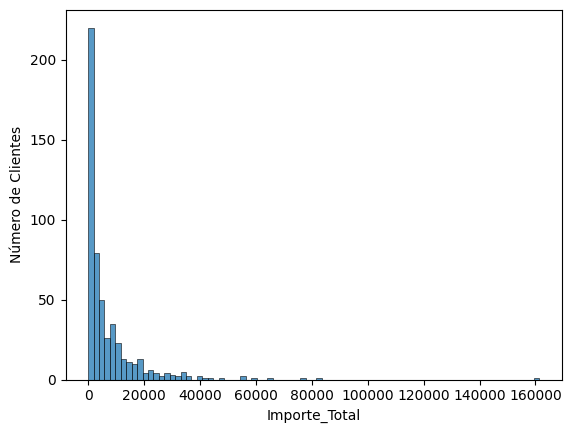

In [ ]:
import seaborn as sns
# El siguiente histograma muestra en el 'eje x' los importes y en el 'eje y' el número de clientes
sns.histplot(data=clientes, x="Importe_Total")
plt.ylabel("Número de Clientes")
plt.show()

In [ ]:
clientes3.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Importe_Total,Escolaridad_3o de Secundaria,Escolaridad_Ingenieria,Escolaridad_Licenciatura,Escolaridad_Maestria,Escolaridad_Otro,...,Funcion_GENERICO,Funcion_OFICINISTA A,Funcion_OFICINISTA B,Funcion_PROFESIONISTA,Funcion_SUPERVISOR A,Funcion_SUPERVISOR B,Grupo_DIRECTIVOES,Grupo_EJECUTIVOS,Grupo_EMPLEADOS,Grupo_SINDICALIZADOS
0,129070,-0.442857,0.757686,0.105127,12284.60,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,168833,-0.442857,0.004313,0.631011,17557.79,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,139044,2.665052,4.147864,1.814250,161303.15,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,165427,-0.442857,0.192656,0.499540,34547.29,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,187492,-0.442857,-0.372373,-0.420757,25111.90,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


Decidí separar la columna Importe_Total en intervalos:

In [ ]:
clientes3 = clientes2.copy()

In [ ]:
# Definir los intervalos y las etiquetas
intervalos = [0, 20000, float('inf')]
etiquetas = [1, 2]

# Aplicar las etiquetas a la columna "Importe"
clientes3['Target'] = pd.cut(clientes2['Importe_Total'], bins=intervalos, labels=etiquetas)

# Mostrar el DataFrame resultante
clientes3.head(10)

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Importe_Total,Escolaridad_3o de Secundaria,Escolaridad_Ingenieria,Escolaridad_Licenciatura,Escolaridad_Maestria,Escolaridad_Otro,...,Funcion_OFICINISTA A,Funcion_OFICINISTA B,Funcion_PROFESIONISTA,Funcion_SUPERVISOR A,Funcion_SUPERVISOR B,Grupo_DIRECTIVOES,Grupo_EJECUTIVOS,Grupo_EMPLEADOS,Grupo_SINDICALIZADOS,Target
0,129070,-0.442857,0.757686,0.105127,12284.60,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,168833,-0.442857,0.004313,0.631011,17557.79,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,139044,2.665052,4.147864,1.814250,161303.15,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,2
3,165427,-0.442857,0.192656,0.499540,34547.29,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2
4,187492,-0.442857,-0.372373,-0.420757,25111.90,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2
5,176268,-0.442857,0.004313,1.288366,56233.31,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
6,104423,0.593112,1.511059,0.762482,25355.29,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,2
7,179211,-0.442857,-0.184030,-0.815170,8865.22,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,181381,-0.442857,0.381000,-0.683699,9109.15,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,156985,-0.442857,0.381000,0.893953,16576.29,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Definir los intervalos y las etiquetas
intervalos = [0, 10000, 20000, float('inf')]
etiquetas = [1, 2, 3]

# Aplicar las etiquetas a la columna "Importe"
clientes3['Target'] = pd.cut(clientes2['Importe_Total'], bins=intervalos, labels=etiquetas)

# Mostrar el DataFrame resultante
clientes3.head(10)

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Importe_Total,Escolaridad_3o de Secundaria,Escolaridad_Ingenieria,Escolaridad_Licenciatura,Escolaridad_Maestria,Escolaridad_Otro,...,Funcion_OFICINISTA A,Funcion_OFICINISTA B,Funcion_PROFESIONISTA,Funcion_SUPERVISOR A,Funcion_SUPERVISOR B,Grupo_DIRECTIVOES,Grupo_EJECUTIVOS,Grupo_EMPLEADOS,Grupo_SINDICALIZADOS,Target
0,129070,-0.442857,0.757686,0.105127,12284.60,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,2
1,168833,-0.442857,0.004313,0.631011,17557.79,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,139044,2.665052,4.147864,1.814250,161303.15,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,3
3,165427,-0.442857,0.192656,0.499540,34547.29,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,3
4,187492,-0.442857,-0.372373,-0.420757,25111.90,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,3
5,176268,-0.442857,0.004313,1.288366,56233.31,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
6,104423,0.593112,1.511059,0.762482,25355.29,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,3
7,179211,-0.442857,-0.184030,-0.815170,8865.22,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,181381,-0.442857,0.381000,-0.683699,9109.15,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,156985,-0.442857,0.381000,0.893953,16576.29,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


Con la columna importe divida en 4 intervalos para crear 4 etiquetas los modelos no funcionaron muy bien, lo más a lo que llegaba era un Accuracy de 0.6.

Tampoco funcionó haciendo más de 4 etiquetas para ver si podía funcionar.


```
# Definir los intervalos y las etiquetas
intervalos2 = [0, 4000, 12000, 20000, float('inf')]
etiquetas2 = [1, 2, 3, 4]

# Aplicar las etiquetas a la columna "Importe"
clientes3['Target'] = pd.cut(clientes2['Importe_Total'], bins=intervalos2, labels=etiquetas2)

# Mostrar el DataFrame resultante
clientes3.head(10)
```



In [ ]:
X = clientes3.drop(['Clave_Cliente', 'Importe_Total', 'Target'], axis=1)
X.head()

,No._Hijos,Antiguedad,Edad,Escolaridad_3o de Secundaria,Escolaridad_Ingenieria,Escolaridad_Licenciatura,Escolaridad_Maestria,Escolaridad_Otro,Escolaridad_Pasante,Escolaridad_Sin asignar,...,Funcion_GENERICO,Funcion_OFICINISTA A,Funcion_OFICINISTA B,Funcion_PROFESIONISTA,Funcion_SUPERVISOR A,Funcion_SUPERVISOR B,Grupo_DIRECTIVOES,Grupo_EJECUTIVOS,Grupo_EMPLEADOS,Grupo_SINDICALIZADOS
0,-0.442857,0.757686,0.105127,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.442857,0.004313,0.631011,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.665052,4.147864,1.814250,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,-0.442857,0.192656,0.499540,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,-0.442857,-0.372373,-0.420757,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y = clientes3[['Target']]
y.head(10)

,Target
0,2
1,2
2,3
3,3
4,3
5,3
6,3
7,1
8,1
9,2


## Separación train y test

In [ ]:
# Separar los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X,y = X.to_numpy(), y.to_numpy() # .values nos convierte a un arreglo de numpy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((419, 36), (105, 36), (419, 1), (105, 1))

## Modelo

### Regresion Logística

In [ ]:
# Selección del modelo
from sklearn.linear_model import LogisticRegression

logistic1 = LogisticRegression(max_iter = 200, verbose = 1)

In [ ]:
# Entrenamiento del modelo
logistic1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, verbose=1)

In [ ]:
# Predicciones
predictions = logistic1.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Precisión del modelo
score = logistic1.score(X_test, y_test)
score

0.8095238095238095

Con la separación en importe mayor o menor a 20mil (2 etiquetas), se obtuvo Score: 0.9428571428571428

Con la separación del importe en 3 intervalos (< 10mil,10-20mil, >20mil) (3 etiquetas), se obtuvo Score: 0.8095238095238095

In [ ]:
# Matriz de confusion
from sklearn import metrics
metrics.confusion_matrix(y_test, predictions)

array([[85,  2,  1],
       [ 8,  0,  2],
       [ 7,  0,  0]])

### C-Support Vector Classification

In [ ]:
from sklearn.svm import SVC

clf = SVC()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8380952380952381

Con la separación en importe mayor o menor a 20mil (2 etiquetas), se obtuvo Score: 0.9619047619047619

Con la separación del importe en 3 intervalos (< 10mil,10-20mil, >20mil) (3 etiquetas), se obtuvo Score: 0.8380952380952381

## Metricas

In [ ]:
print("+-{:^16}-+-{:^16}-+-{:^16}-+".format("-----", "-----", "-----"))
print("| {:^16} | {:^16} | {:^16} |".format("", "Actual positive", "Actual negative"))
print("+-{:^16}-+-{:^16}-+-{:^16}-+".format("-----", "-----", "-----"))
print("| {:^16} | {:^16} | {:^16} |".format("Pred positive", "True positive", "False positive"))
print("+-{:^16}-+-{:^16}-+-{:^16}-+".format("-----", "-----", "-----"))
print("| {:^16} | {:^16} | {:^16} |".format("Pred negative", "False Negative", "True negative"))
print("+-{:^16}-+-{:^16}-+-{:^16}-+".format("-----", "-----", "-----"))

+-     -----      -+-     -----      -+-     -----      -+
|                  | Actual positive  | Actual negative  |
+-     -----      -+-     -----      -+-     -----      -+
|  Pred positive   |  True positive   |  False positive  |
+-     -----      -+-     -----      -+-     -----      -+
|  Pred negative   |  False Negative  |  True negative   |
+-     -----      -+-     -----      -+-     -----      -+


In [ ]:
# Para SVC
predictions2 = clf.predict(X_test)

# Matriz de confusion
from sklearn import metrics
metrics.confusion_matrix(y_test, predictions2)

array([[101,   0],
       [  4,   0]])

In [ ]:
# Reporte completo
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       101
           2       0.00      0.00      0.00         4

    accuracy                           0.96       105
   macro avg       0.48      0.50      0.49       105
weighted avg       0.93      0.96      0.94       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Score 0.9428571428571428')

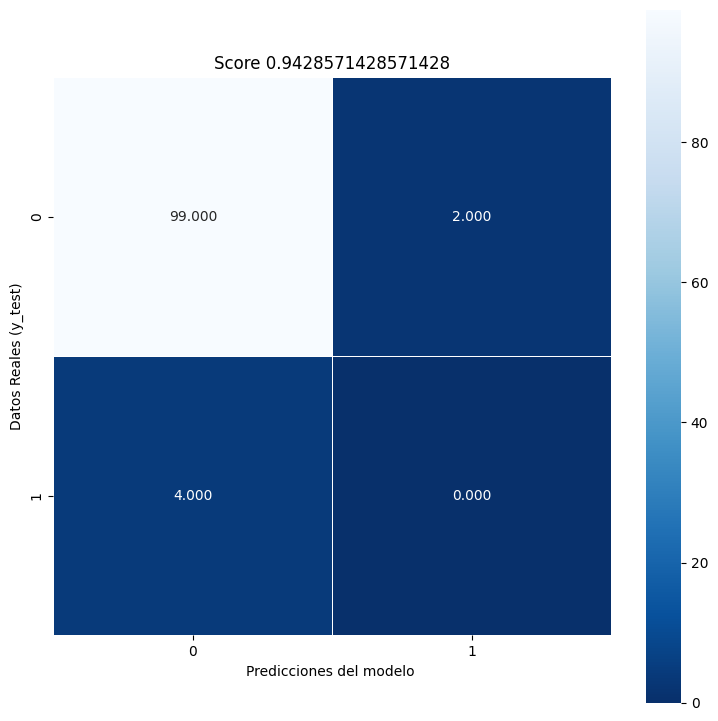

In [ ]:
# Matriz de confusion
from sklearn import metrics
mc = metrics.confusion_matrix(y_test, predictions)
mc

# Visualicemos la matriz de confusion
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(mc, annot = True, fmt = ".3f",
            linewidths=0.5, square = True,
            cmap = "Blues_r")
plt.ylabel("Datos Reales (y_test)")
plt.xlabel("Predicciones del modelo ")
plt.title("Score {0}".format(score))

## Analisis

Para el siguiente análisis tomo clientes pero sin normalizar ni hacer el one hot encode

In [ ]:
clientes.head()

,Clave_Cliente,No._Hijos,Antiguedad,Edad,Escolaridad,Estado_Civil,Sexo,Funcion,Grupo,Importe_Total
0,129070,0,10,35,Ingenieria,Soltero,Masculino,PROFESIONISTA,EJECUTIVOS,12284.60
1,168833,0,6,39,Sin asignar,Soltero,Femenino,EMPLEADO A,EMPLEADOS,17557.79
2,139044,3,28,48,Licenciatura,Casado,Masculino,OFICINISTA A,EMPLEADOS,161303.15
3,165427,0,7,38,Sin asignar,Casado,Masculino,PROFESIONISTA,EJECUTIVOS,34547.29
4,187492,0,4,31,Sin asignar,Soltero,Femenino,OFICINISTA A,EMPLEADOS,25111.90


In [ ]:
# Crea un nuevo DataFrame con los registros donde Importe > 20000
Clientes_Imp_Alto = clientes[clientes['Importe_Total'] > 20000]

In [ ]:
len(Clientes_Imp_Alto)

42

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'OFICINISTA A'),
  Text(1, 0, 'PROFESIONISTA'),
  Text(2, 0, 'EMPLEADO A'),
  Text(3, 0, 'OFICINISTA B'),
  Text(4, 0, 'DIRECTIVO FUNCIONAL'),
  Text(5, 0, 'DIRECTIVO GENERAL')])

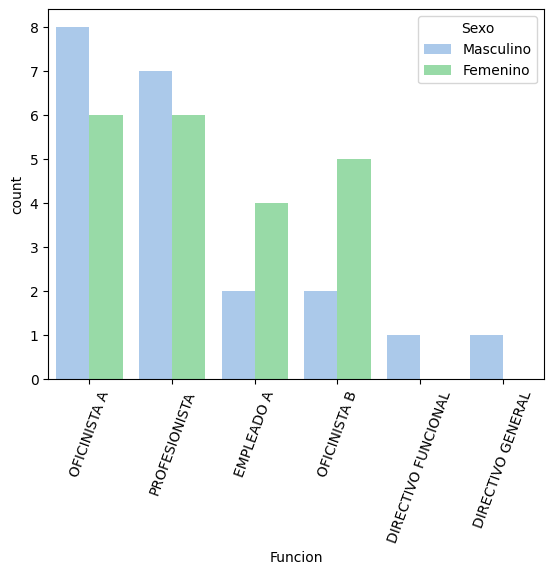

In [ ]:
sns.countplot(data=Clientes_Imp_Alto, x="Funcion", hue="Sexo", palette="pastel6")
plt.xticks(rotation=70)

In [ ]:
# Crea un nuevo DataFrame con los registros donde:
Clientes_Imp_Bajo = clientes[clientes['Importe_Total'] <= 20000]

In [ ]:
len(Clientes_Imp_Bajo)

482

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'PROFESIONISTA'),
  Text(1, 0, 'EMPLEADO A'),
  Text(2, 0, 'OFICINISTA A'),
  Text(3, 0, 'OFICINISTA B'),
  Text(4, 0, 'GENERICO'),
  Text(5, 0, 'EMPLEADO B'),
  Text(6, 0, 'COORDINADOR'),
  Text(7, 0, 'SUPERVISOR A'),
  Text(8, 0, 'AUXILIAR'),
  Text(9, 0, 'DIRECTIVO FUNCIONAL'),
  Text(10, 0, 'SUPERVISOR B')])

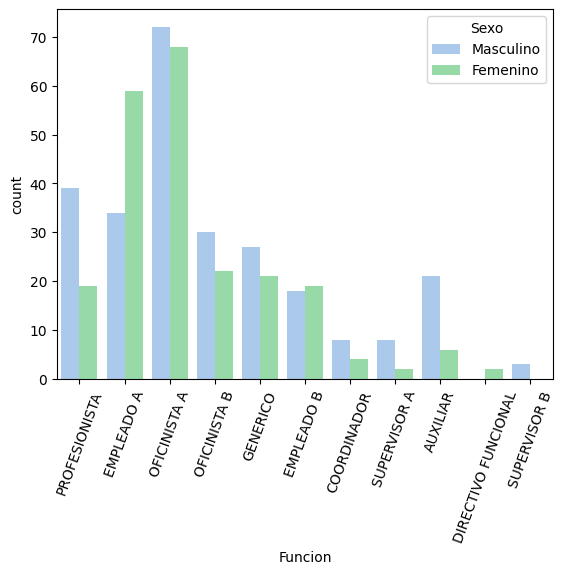

In [ ]:
sns.countplot(data=Clientes_Imp_Bajo, x="Funcion", hue="Sexo", palette="pastel6")
plt.xticks(rotation=70)

<Axes: xlabel='No._Hijos', ylabel='count'>

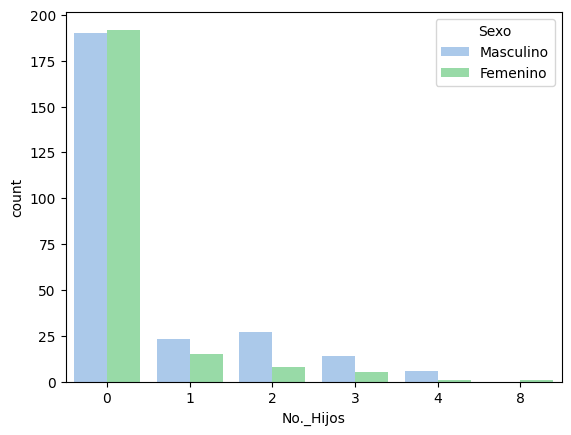

In [ ]:
sns.countplot(data=Clientes_Imp_Bajo, x="No._Hijos", hue="Sexo", palette="pastel6")

<Axes: xlabel='Antiguedad', ylabel='count'>

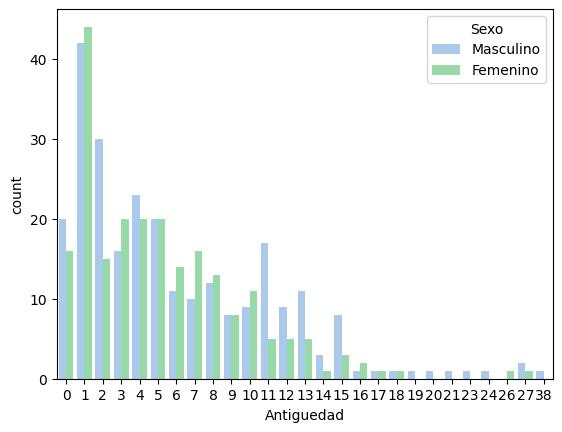

In [ ]:
sns.countplot(data=Clientes_Imp_Bajo, x="Antiguedad", hue="Sexo", palette="pastel6")